# Case HR
#### The case revolves around a fictitious company and the core data set contains: names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, performance score, absences, most recent performance review date, and employee engagement score.

##### Our objective is to find out how the HR policy of the company can improve:
##### 1 - What are our best recruiting sources if we want to ensure a diverse organization?

##### 2 - Is there any relationship between who a person works for and their performance score?

##### 3 - Which are the main reasons our employees are leaving us?
##### Revisar los motivos de dropout de los empleados


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [57]:
df=pd.read_csv('../datasets/HRDataset_clean.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [58]:
df.shape

(311, 36)

In [59]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,15.167203,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.842585,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,16.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.500000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [60]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 


Preview of data with null values:
xxxxxxxxxxxxx
         Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0  Adinolfi, Wilson  K  10026          0                0         1   
3         Alagbe,Trina  10088          1                1         0   
5    Anderson, Linda    10002          0                0         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
3            1       5            3                       0   64991  ...   
5            1       5            4                       0   57568  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert       22.0          LinkedIn          Exceeds   
3    Elijiah Gray       16.0            Indeed      Fully Meets   
5        Amy Dunn       11.0          LinkedIn          Exceeds   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60             

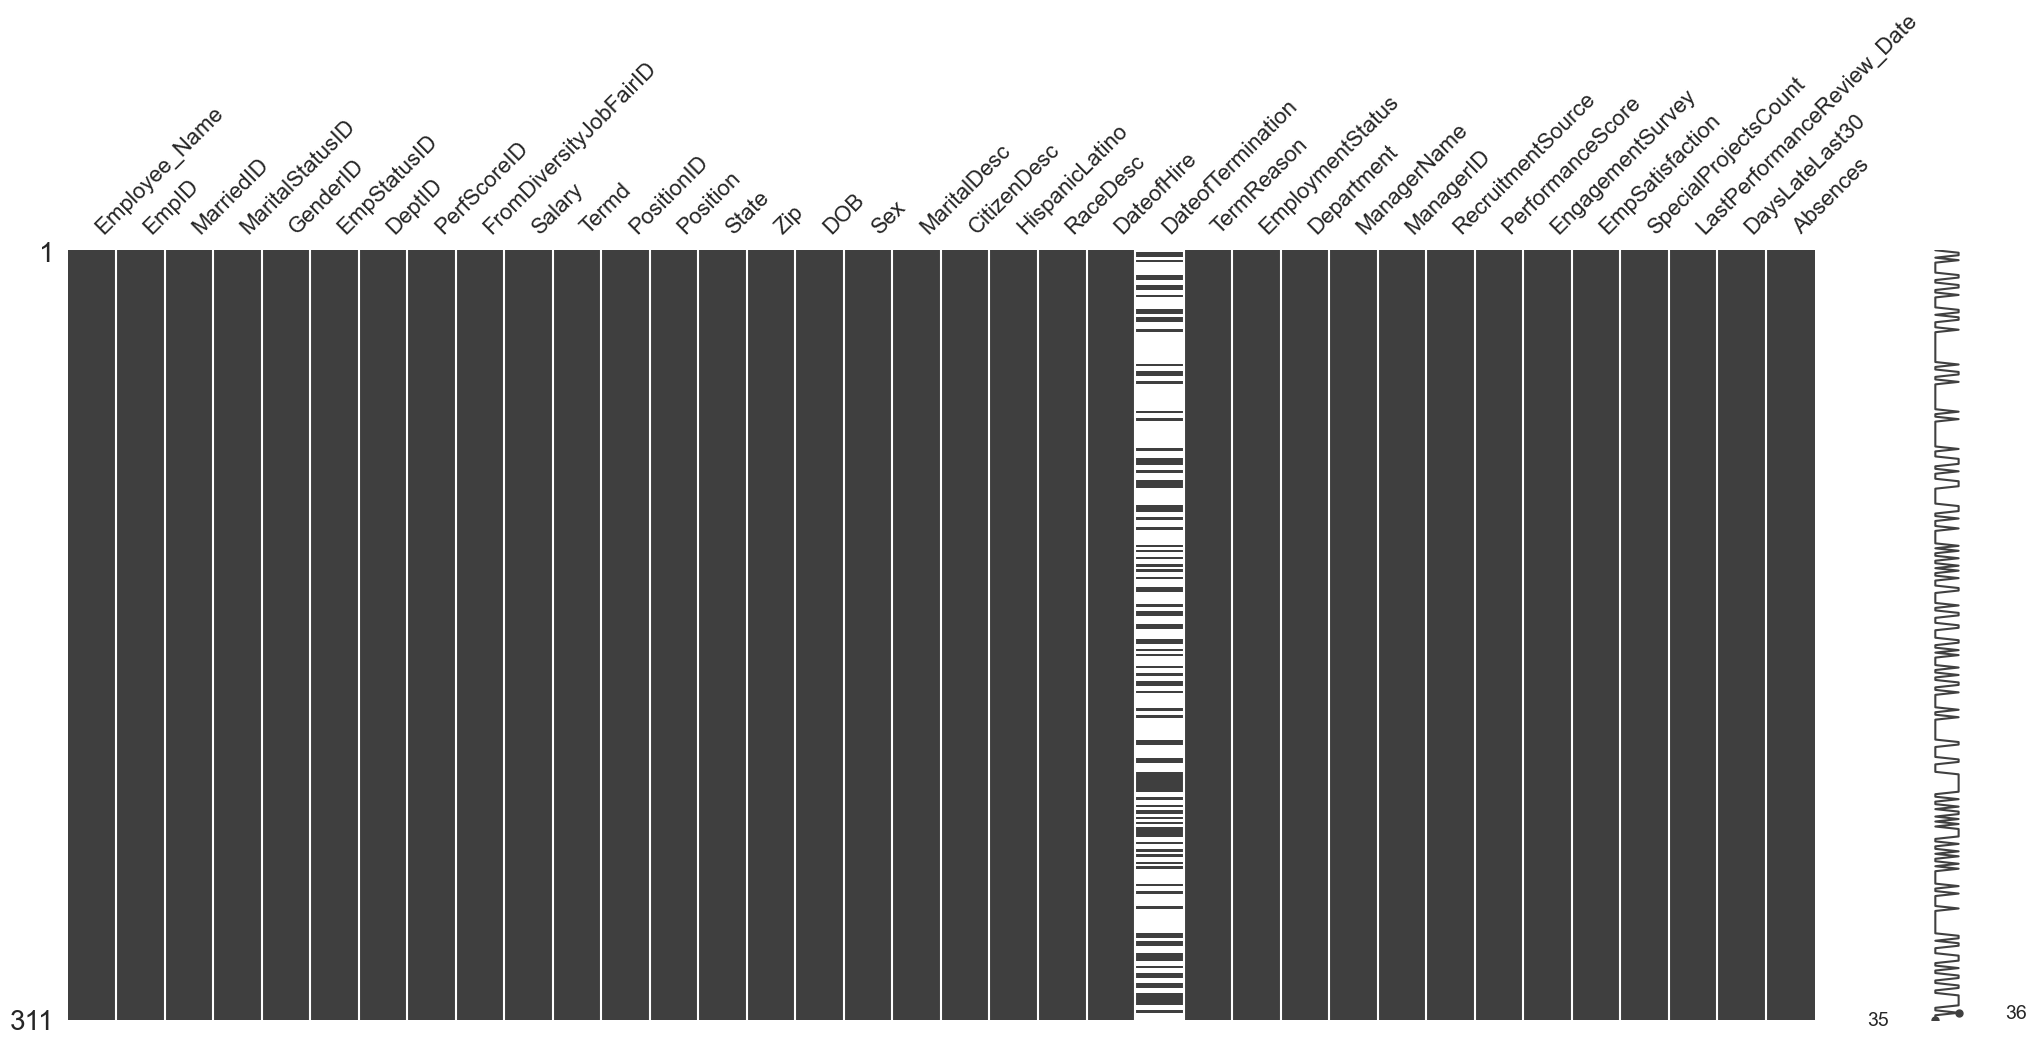

In [61]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

### We see that there is a lot of ID columns that the numbers refer to a categorical variable, so we change it into str

In [63]:
for column_name in df.columns:
    # Check if the column name contains 'ID' excluding the PerfScore ID whic is a proper numerical variable
    if 'ID' in column_name and column_name != 'PerfScoreID':
        # Change the column dtype to string
        df[column_name] = df[column_name].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    object 
 2   MarriedID                   311 non-null    object 
 3   MaritalStatusID             311 non-null    object 
 4   GenderID                    311 non-null    object 
 5   EmpStatusID                 311 non-null    object 
 6   DeptID                      311 non-null    object 
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    object 
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    object 
 12  Position                    311 non-null    object 
 13  State                       311 non

In [64]:
#now we also want to check for duplicates
df = df.drop_duplicates()
df.shape

(311, 36)

In [65]:
#now that we have the data frame in the proper dtype format and we had verified that there are no duplicates, we explore the columns that are objects
for col in df.columns: 
    if df[col].dtype == 'object':
        if df[col].nunique() < 10: 
            print(col)
            print(df[col].value_counts())
            print()
        else:
            print('It was not shown: {}'.format(col))

It was not shown: Employee_Name
It was not shown: EmpID
MarriedID
0    187
1    124
Name: MarriedID, dtype: int64

MaritalStatusID
0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

GenderID
0    176
1    135
Name: GenderID, dtype: int64

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

DeptID
5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

FromDiversityJobFairID
0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

It was not shown: PositionID
It was not shown: Position
It was not shown: State
It was not shown: DOB
Sex
F     176
M     135
Name: Sex, dtype: int64

MaritalDesc
Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

CitizenDesc
US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

HispanicLatino
No     282
Yes     27
no       1
yes      1


In [66]:
#we also can see that there is a problem with some of the columns that contain the same information but written in different ways, lets fix that
df['HispanicLatino'] = df['HispanicLatino'].str.lower()
df['HispanicLatino'].value_counts()

no     283
yes     28
Name: HispanicLatino, dtype: int64

## 1.What are our best recruiting sources if we want to ensure a diverse organization?

In [67]:
#We group the data by each 'RecruitmentSource' and the 'RaceDesc' column and count how many per each cathegory
df.groupby('RecruitmentSource')[['HispanicLatino','RaceDesc']].value_counts()

RecruitmentSource        HispanicLatino  RaceDesc                        
CareerBuilder            no              White                               15
                                         Black or African American            5
                                         Asian                                2
                         yes             White                                1
Diversity Job Fair       no              Black or African American           22
                         yes             Black or African American            7
Employee Referral        no              White                               22
                                         Black or African American            5
                         yes             White                                3
                         no              Asian                                1
Google Search            no              White                               31
                                         Asian

Text(0.5, 1.0, 'RecruitmentSource by Race')

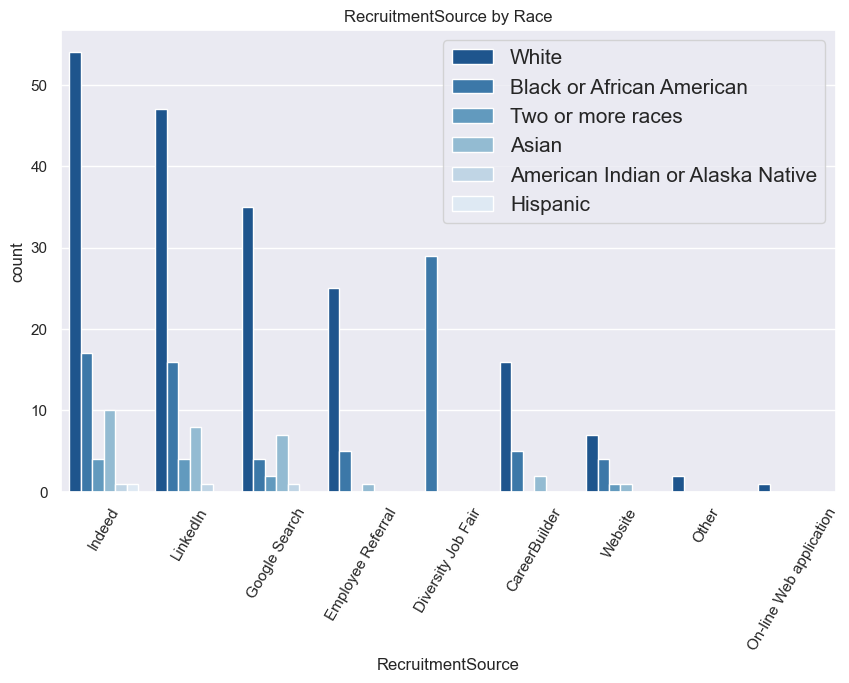

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df, hue='RaceDesc',order=df['RecruitmentSource'].value_counts().index ,palette='Blues_r')
plt.legend(prop={'size': 15})
plt.xticks(rotation=60)
plt.title('RecruitmentSource by Race')

In [69]:
#we see that in the cathegory of "whites" there are some HispanicLatinos, so we have to include them aswell in the diversity dataframe we want to analyze
df.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              White                               169
                Black or African American            72
                Asian                                29
yes             White                                18
no              Two or more races                    10
yes             Black or African American             8
no              American Indian or Alaska Native      3
yes             Hispanic                              1
                Two or more races                     1
dtype: int64

### We can see that there is 18 White HispanicLatino people that we have to include in the diversity group

In [70]:
#we see that white people will not be included in the "Diversity", so we have to exclude them to from the analysis
df_diversity = df[~((df['HispanicLatino'] == 'no')&(df['RaceDesc'] == 'White'))]
#The ~ symbol is used to negate the entire condition, effectively selecting rows where the condition is False.

In [71]:
df_diversity.shape

(142, 36)

In [72]:
df_diversity.groupby('HispanicLatino')[['RaceDesc']].value_counts().sort_values(ascending=False)

HispanicLatino  RaceDesc                        
no              Black or African American           72
                Asian                               29
yes             White                               18
no              Two or more races                   10
yes             Black or African American            8
no              American Indian or Alaska Native     3
yes             Hispanic                             1
                Two or more races                    1
dtype: int64

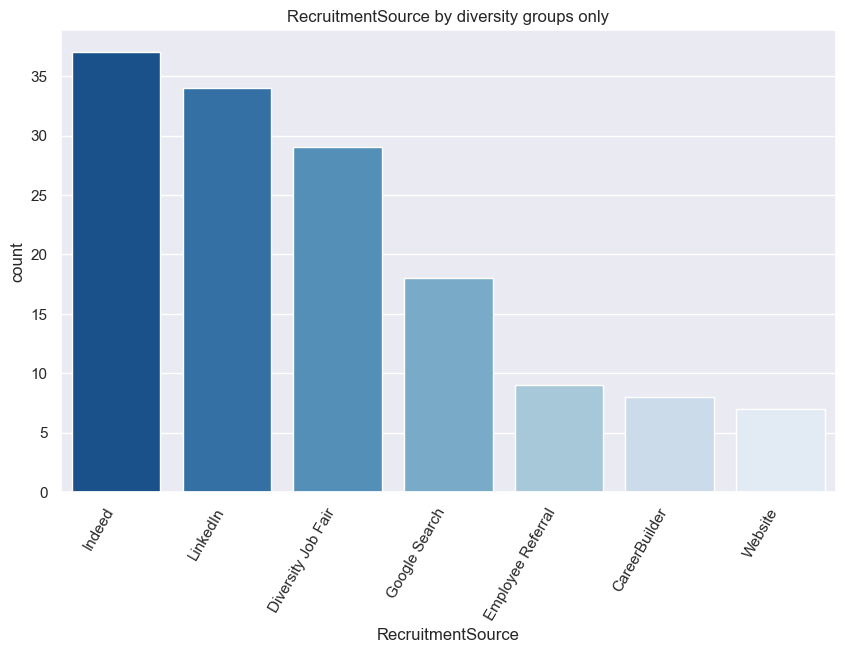

In [73]:
#we also know that we could group the rest of the values in the 'RaceDesc' as from the 'Diversity' group (no need to create distinctions)
plt.figure(figsize=(10, 6))
sns.countplot(x='RecruitmentSource', data=df_diversity, order=df_diversity['RecruitmentSource'].value_counts().index, palette='Blues_r')

plt.xticks(rotation=60, ha='right')
plt.title('RecruitmentSource by diversity groups only')
plt.show()

### we can also calculate the ratio of diversity per each RecruitmentSource from the total of employees

In [74]:
#we will create a function that divides the sum of all the 'RecruitmmentSource' sum per each category from the df_diversity by the same but from the df dataframe
def ratio(x, y):
    result = (x/y)*100
    return round(result,2)
DiversityRatio = ratio(df_diversity['RecruitmentSource'].value_counts(), df['RecruitmentSource'].value_counts()).fillna(0)
DiversityRatio

CareerBuilder               34.78
Diversity Job Fair         100.00
Employee Referral           29.03
Google Search               36.73
Indeed                      42.53
LinkedIn                    44.74
On-line Web application      0.00
Other                        0.00
Website                     53.85
Name: RecruitmentSource, dtype: float64

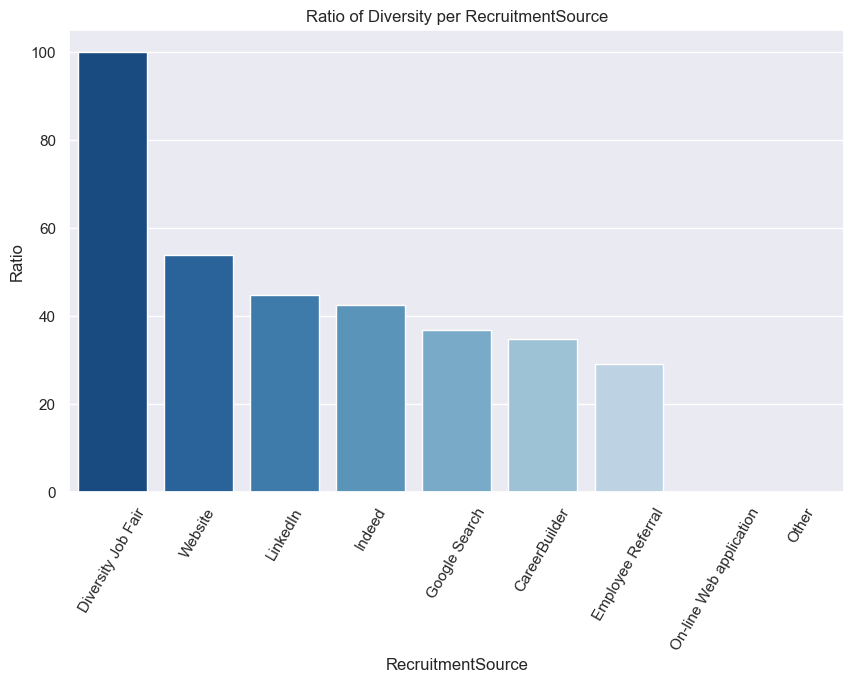

In [75]:
DiversityRatio_sorted = DiversityRatio.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=DiversityRatio_sorted.index, y=DiversityRatio_sorted.values, palette='Blues_r')

plt.title('Ratio of Diversity per RecruitmentSource')
plt.xlabel('RecruitmentSource')
plt.ylabel('Ratio')
plt.xticks(rotation=60)

plt.show()

## 2 - Is there any relationship between who a person works for and their performance score?

In [76]:
PerfbyManager = df.groupby('ManagerName')['PerfScoreID'].mean().round(2)
PerfbyManager

ManagerName
Alex Sweetwater       3.11
Amy Dunn              2.90
Board of Directors    3.00
Brandon R. LeBlanc    3.00
Brannon Miller        2.82
Brian Champaigne      3.00
David Stanley         3.00
Debra Houlihan        2.67
Elijiah Gray          3.00
Eric Dougall          3.25
Janet King            3.11
Jennifer Zamora       3.14
John Smith            2.71
Kelley Spirea         3.09
Ketsia Liebig         3.05
Kissy Sullivan        2.95
Lynn Daneault         3.00
Michael Albert        2.86
Peter Monroe          2.86
Simon Roup            3.12
Webster Butler        3.00
Name: PerfScoreID, dtype: float64

In [77]:
EmpbyManager = df.groupby('ManagerName')['EmpID'].count().sort_values(ascending=False)
EmpbyManager

ManagerName
Michael Albert        22
Kissy Sullivan        22
Brannon Miller        22
Kelley Spirea         22
Elijiah Gray          22
Webster Butler        21
Amy Dunn              21
Ketsia Liebig         21
David Stanley         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: EmpID, dtype: int64

In [78]:
df_managerperfv = pd.merge(df['ManagerName'], PerfbyManager, on='ManagerName')
df_managerperfv = df_managerperfv.drop_duplicates().sort_values('PerfScoreID', ascending=False)
df_managerperfv['PerfScoreIDNorm'] = df_managerperfv['PerfScoreID'] / (df_managerperfv['PerfScoreID'].sum() / df_managerperfv['PerfScoreID'].count())

df_managerperfv

,ManagerName,PerfScoreID,PerfScoreIDNorm
294,Eric Dougall,3.25,1.089559
274,Jennifer Zamora,3.14,1.052682
22,Simon Roup,3.12,1.045977
125,Alex Sweetwater,3.11,1.042625
241,Janet King,3.11,1.042625
212,Kelley Spirea,3.09,1.035920
134,Ketsia Liebig,3.05,1.022510
191,David Stanley,3.00,1.005747
301,Brian Champaigne,3.00,1.005747
281,Lynn Daneault,3.00,1.005747


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Michael Albert'),
  Text(1, 0, 'Kissy Sullivan'),
  Text(2, 0, 'Elijiah Gray'),
  Text(3, 0, 'Kelley Spirea'),
  Text(4, 0, 'Brannon Miller'),
  Text(5, 0, 'Ketsia Liebig'),
  Text(6, 0, 'David Stanley'),
  Text(7, 0, 'Amy Dunn'),
  Text(8, 0, 'Webster Butler'),
  Text(9, 0, 'Janet King'),
  Text(10, 0, 'Simon Roup'),
  Text(11, 0, 'Peter Monroe'),
  Text(12, 0, 'John Smith'),
  Text(13, 0, 'Lynn Daneault'),
  Text(14, 0, 'Alex Sweetwater'),
  Text(15, 0, 'Brian Champaigne'),
  Text(16, 0, 'Brandon R. LeBlanc'),
  Text(17, 0, 'Jennifer Zamora'),
  Text(18, 0, 'Eric Dougall'),
  Text(19, 0, 'Debra Houlihan'),
  Text(20, 0, 'Board of Directors')])

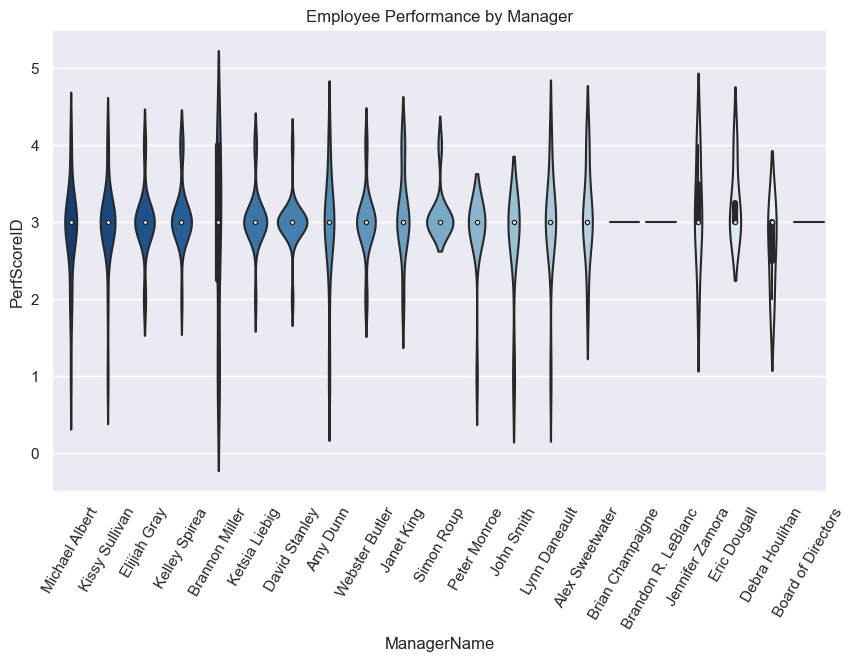

In [79]:
#el siguiente gráfico esta ordenado de manager con más empleados a menos
plt.figure(figsize=(10, 6))
sns.violinplot(x='ManagerName',y='PerfScoreID',data=df,palette='Blues_r',order=df['ManagerName'].value_counts().index)
plt.title('Employee Performance by Manager')
plt.xticks(rotation=60)

### Podemos concluir que no existe una relación directa, entre el manager y la performance score de sus empleados, exceptuando algunos casos puntuales

C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\1318317679.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_filtered = df.drop(columns_to_exclude, axis=1).corr()


[None, None, None, None, None, None, None, None, None, None]

<Figure size 1000x600 with 0 Axes>

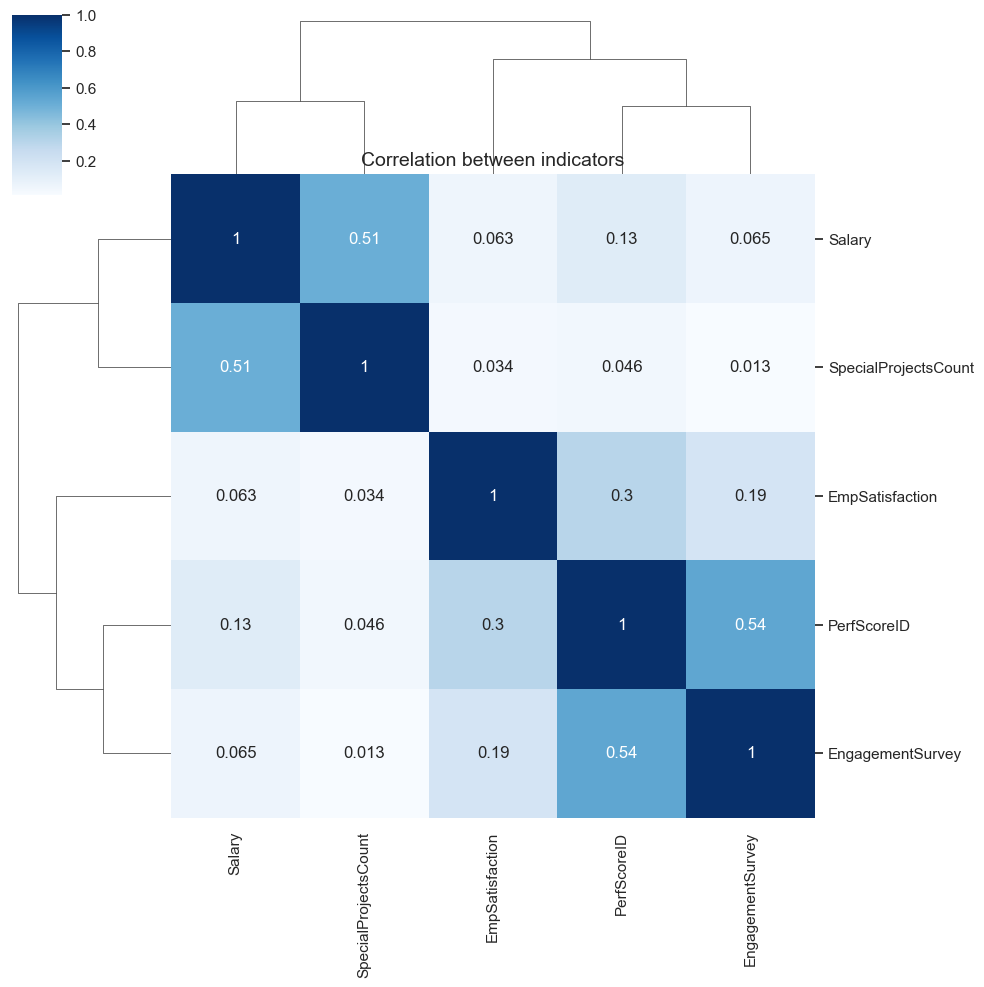

In [80]:
# por otro lado, podemos identificar mediante un mapa de coorrelación, otras variables que SI afectan a la PerfScore de los empleados
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
# Exclude specific columns from the correlation matrix
columns_to_exclude = ['Zip', 'Termd','Absences','DaysLateLast30']
corr_filtered = df.drop(columns_to_exclude, axis=1).corr()
#create the plot
clustermap = sns.clustermap(corr_filtered, annot=True, cmap='Blues')
clustermap.ax_heatmap.set_title('Correlation between indicators', fontsize=14)
# Rotate the y-axis labels horizontally
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

#### We can see there is a good correlation between the Performance Score and the Level of engagment of the Employees, which make sense. On the other hand, we also see that the re is correlation, in second degree, with the satisfaction of the employee. In 3rd degree, we see that it correlates with the Salary, which at the same time, is highly influenced by the Special Projects each employee has carried out.
### <span style="color:red">So the conclusion here could be that a much more implication in Special projects, could lead to an increase of salaray and motivation, resulting in a final increase in the performance of the employee.

## 3 - Which are the main reasons our employees are leaving us?

In [81]:
#lets firs texplore the Termination reason behind people quiting the job
df['TermReason'].value_counts().sort_values(ascending=False)

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
retiring                              4
performance                           4
no-call, no-show                      4
military                              4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

In [82]:
#we can see that there is a value of N/A-StillEmployed that we are not interested in. For that, we will create a new df whit all this values removed
df_terminated = df[df['TermReason'] != 'N/A-StillEmployed']
df_terminated['TermReason'].value_counts()

Another position                    20
unhappy                             14
more money                          11
career change                        9
hours                                8
attendance                           7
return to school                     5
relocation out of area               5
no-call, no-show                     4
military                             4
retiring                             4
performance                          4
maternity leave - did not return     3
medical issues                       3
Learned that he is a gangster        1
Fatal attraction                     1
gross misconduct                     1
Name: TermReason, dtype: int64

In [83]:
#we see there is a lot of categories in the 'TermReason' column, so we will group the less frequent ones in one category called 'Others' (and also, there are some "reasons" that doesn't make sense)
# List of string values to merge into 'Others'
merge_values = ['Another position','unhappy','more money','career change','hours','attendance','return to school','relocation out of area']

# Replace rows with merge_values with 'Others'
df_terminated.loc[~df_terminated['TermReason'].isin(merge_values), 'TermReason'] = 'Others'

df_terminated['TermReason'].value_counts()

Others                    25
Another position          20
unhappy                   14
more money                11
career change              9
hours                      8
attendance                 7
return to school           5
relocation out of area     5
Name: TermReason, dtype: int64

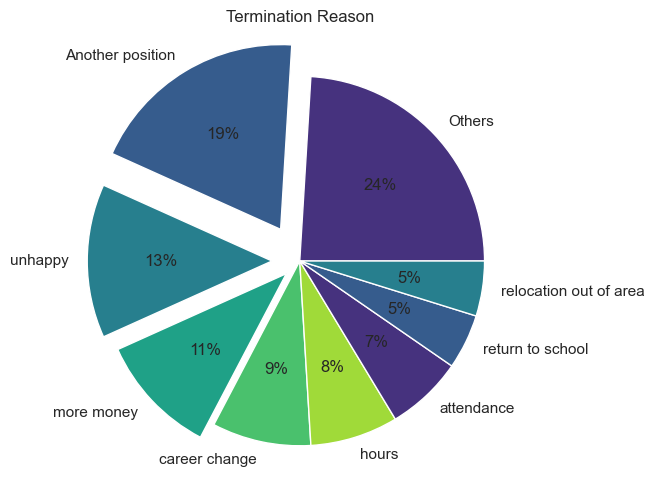

In [84]:
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_terminated['TermReason'].value_counts()

# Define the categories to explode
explode_categories = ['Another position', 'unhappy', 'more money']

# Define the explosion levels for the specified categories
explode_levels = [0.2, 0.15, 0.1]

# Create a list to store the explosion values for all categories
explode = [explode_levels[explode_categories.index(reason)] if reason in explode_categories else 0 for reason in term_reason_counts.index]

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Termination Reason')

# Displaying the chart
plt.show()

### we can see that there the principial reasons behind people leaving are because they are looking for another position, are unhappy, or they feel that they are not pay for their job done

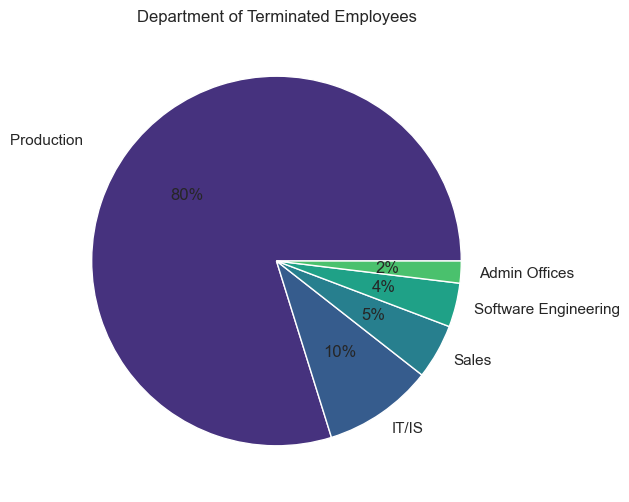

In [85]:
#I am curiose to see if there is a relation with the department they were from
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_depart_counts = df_terminated['Department'].value_counts()

# Plotting data on the chart
plt.pie(term_depart_counts, labels=term_depart_counts.index, colors=palette_color, autopct='%.0f%%')

plt.title('Department of Terminated Employees')
# Displaying the chart
plt.show()

### We see there is a clear problem in the Production department. Lets focus on this department

In [86]:
df_terminated['Department'].unique()

array(['IT/IS', 'Production       ', 'Sales', 'Software Engineering',
       'Admin Offices'], dtype=object)

In [87]:
#there is an issue with the name of Production, on the key department. We fix this by:
# Change the column name from 'old_column_name' to 'new_column_name'
df_terminated['Department'] = df_terminated['Department'].replace('Production       ', 'Production', regex=True)
df_terminated['Department'].unique()

C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\3195745911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Department'] = df_terminated['Department'].replace('Production       ', 'Production', regex=True)


array(['IT/IS', 'Production', 'Sales', 'Software Engineering',
       'Admin Offices'], dtype=object)

In [88]:
df_prodterm = df_terminated[df_terminated['Department'] == 'Production']
df_prodterm.shape

(83, 36)

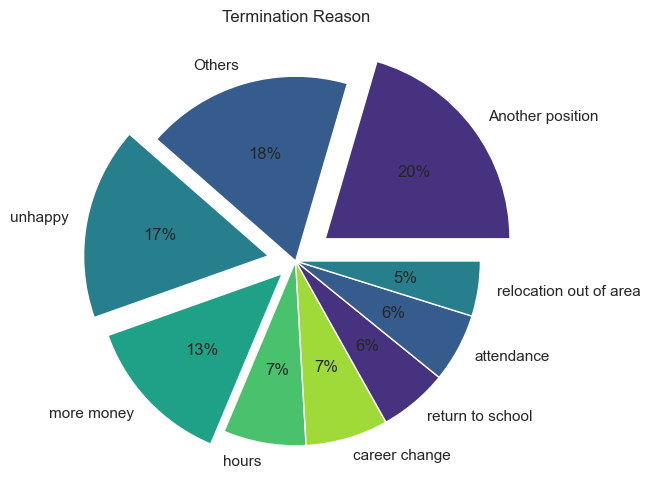

In [89]:
#lets check, inside of these department, what are the main reasons of people leaving the company:
plt.figure(figsize=(10, 6))
palette_color = sns.color_palette('viridis')

term_reason_counts = df_prodterm['TermReason'].value_counts()

# Define the categories to explode
explode_categories = ['Another position', 'unhappy', 'more money']

# Define the explosion levels for the specified categories
explode_levels = [0.2, 0.15, 0.1]

# Create a list to store the explosion values for all categories
explode = [explode_levels[explode_categories.index(reason)] if reason in explode_categories else 0 for reason in term_reason_counts.index]

# Plotting data on the chart
plt.pie(term_reason_counts, labels=term_reason_counts.index, colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Termination Reason')

# Displaying the chart
plt.show()

### We see that still, the reasons why people is leaving the company is because they are looking for another position, but also because they are unhappy

In [90]:
#Lets also check what are the managers per department:
df_prodterm.groupby('ManagerName')['EmpSatisfaction'].mean().sort_values(ascending=True)

ManagerName
Brannon Miller    3.000000
Janet King        3.400000
Kissy Sullivan    3.666667
Elijiah Gray      3.750000
Amy Dunn          3.769231
David Stanley     3.833333
Ketsia Liebig     4.000000
Webster Butler    4.076923
Kelley Spirea     4.333333
Michael Albert    4.444444
Name: EmpSatisfaction, dtype: float64

In [91]:
df_prodterm.groupby('ManagerName')['EngagementSurvey'].mean().sort_values(ascending=True)

ManagerName
Elijiah Gray      3.832500
Janet King        3.834000
Ketsia Liebig     3.872000
Brannon Miller    3.900000
Kissy Sullivan    3.975000
Amy Dunn          3.981538
David Stanley     4.145000
Michael Albert    4.293333
Webster Butler    4.367692
Kelley Spirea     4.683333
Name: EngagementSurvey, dtype: float64

In [92]:
df_prodterm['ManagerName'].value_counts()

Webster Butler    13
Amy Dunn          13
Kissy Sullivan    12
Michael Albert     9
Elijiah Gray       8
David Stanley      6
Kelley Spirea      6
Brannon Miller     6
Janet King         5
Ketsia Liebig      5
Name: ManagerName, dtype: int64

### Clearly, there is no correlation between the manager and the Scores of the employees that quit the company. So the problem is not with the managers

In [93]:
#Lets see if there is a relation between the number of Special projects and the quiting of the employees
df_prodterm['SpecialProjectsCount'].value_counts()

0    83
Name: SpecialProjectsCount, dtype: int64

### No special projects have been carried out in the department of Production

In [94]:
#Is there any relation with the amount of Special projects and the people leaving the company?
df.groupby('Department')['SpecialProjectsCount'].sum().sort_values(ascending=False)

Department
IT/IS                   296
Software Engineering     46
Admin Offices            33
Production                4
Executive Office          0
Sales                     0
Name: SpecialProjectsCount, dtype: int64

In [95]:
df_terminated['Department'].value_counts().sort_values(ascending=False)

Production              83
IT/IS                   10
Sales                    5
Software Engineering     4
Admin Offices            2
Name: Department, dtype: int64

### We also can see that there is no correlation between the number of special projects and the number of employees quiting

## <span style="color:red"> We have to conclude, that, probably, the reason people of the Production department leaves the company is based on other parameters we cant measure

## Lets go back to the data overall data of the people that has left the company

In [96]:
#It could be interesting to see the seniority inside the company of the people leaving the company
#First, we will change the dates to datetime and create another column with the time they have been in the company (by the difference between the date of hire and the date of the termination)
df_terminated['DateofHire'] = pd.to_datetime(df_terminated['DateofHire'])
df_terminated['DateofTermination'] = pd.to_datetime(df_terminated['DateofTermination'])
df_terminated.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 307
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               104 non-null    object        
 1   EmpID                       104 non-null    object        
 2   MarriedID                   104 non-null    object        
 3   MaritalStatusID             104 non-null    object        
 4   GenderID                    104 non-null    object        
 5   EmpStatusID                 104 non-null    object        
 6   DeptID                      104 non-null    object        
 7   PerfScoreID                 104 non-null    int64         
 8   FromDiversityJobFairID      104 non-null    object        
 9   Salary                      104 non-null    int64         
 10  Termd                       104 non-null    int64         
 11  PositionID                  104 non-null    object        

C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\1258720726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DateofHire'] = pd.to_datetime(df_terminated['DateofHire'])
C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\1258720726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['DateofTermination'] = pd.to_datetime(df_terminated['DateofTermination'])


In [97]:
#we now create the new column with the the difference between the date of termination and the date of hire
df_terminated['Daysworked'] = df_terminated['DateofTermination'] - df_terminated['DateofHire']
df_terminated['Daysworked']=pd.to_timedelta(df_terminated['Daysworked'], unit='d')
df_terminated['Daysworked'] = df_terminated['Daysworked'].dt.days
df_terminated.dtypes

C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\350556403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Daysworked'] = df_terminated['DateofTermination'] - df_terminated['DateofHire']
C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\350556403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terminated['Daysworked']=pd.to_timedelta(df_terminated['Daysworked'], unit='d')
C:\Users\Paul\AppData\Local\Temp\ipykernel_17980\350556403.py:4: SettingWithCopyWarning: 
A value is trying to b

Employee_Name                         object
EmpID                                 object
MarriedID                             object
MaritalStatusID                       object
GenderID                              object
EmpStatusID                           object
DeptID                                object
PerfScoreID                            int64
FromDiversityJobFairID                object
Salary                                 int64
Termd                                  int64
PositionID                            object
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

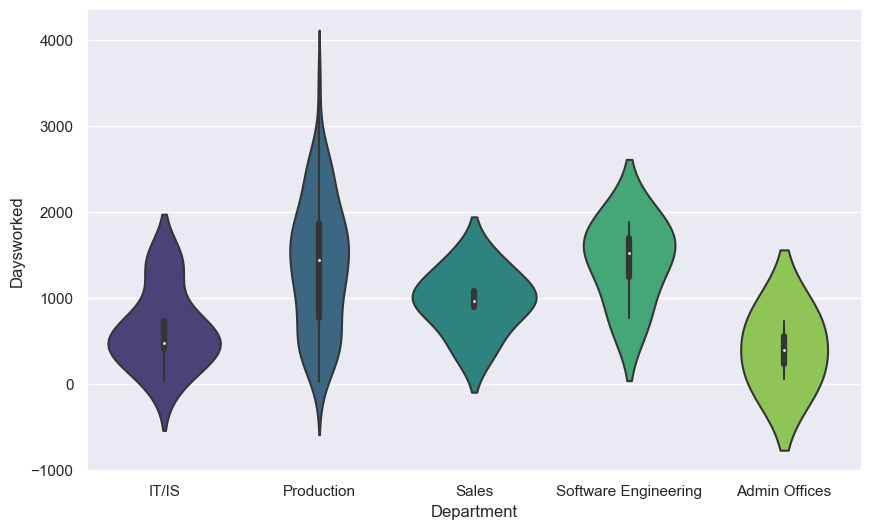

In [99]:
#now, we will create a violin plot to see the lifetime in the company per department
plt.figure(figsize=(10, 6))

sns.violinplot(x='Department', y='Daysworked', data=df_terminated, palette='viridis')
plt.show()

## Lets try and see if we can predict the rate of people leaving the company based on the parameters we have

In [100]:
#we want to see if the terminations can be predicted with an increased number of days being late at work
df_terminated['DaysLateLast30'].value_counts()

0    88
5     5
4     4
3     3
6     3
1     1
Name: DaysLateLast30, dtype: int64

### We see, there is no significant correlation between starting to be late at work and leaving the company

## Is there a correlation between the time of last performance review and the termination date?

### What are the consecuence of not changing anything? Lets apply a predictive model to see the consequences

## Another position

In [503]:
#Lets group all the profiles that left the company for "Another position"
df_anoposition = df_terminated[df_terminated['TermReason'] == 'Another position']
df_anoposition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 10 to 307
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               20 non-null     object 
 1   EmpID                       20 non-null     object 
 2   MarriedID                   20 non-null     object 
 3   MaritalStatusID             20 non-null     object 
 4   GenderID                    20 non-null     object 
 5   EmpStatusID                 20 non-null     object 
 6   DeptID                      20 non-null     object 
 7   PerfScoreID                 20 non-null     int64  
 8   FromDiversityJobFairID      20 non-null     object 
 9   Salary                      20 non-null     int64  
 10  Termd                       20 non-null     int64  
 11  PositionID                  20 non-null     object 
 12  Position                    20 non-null     object 
 13  State                       20 non-

In [443]:
#we will modify the columns of 'DateofHire' and 'LastPerformanceReview_Date' from the df_anoposition to the dtype of date:
df_anoposition['DateofHire'] = pd.to_datetime(df_anoposition['DateofHire'])
df_anoposition['LastPerformanceReview_Date'] = pd.to_datetime(df_anoposition['LastPerformanceReview_Date'])
df_anoposition.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 10 to 307
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               20 non-null     object        
 1   EmpID                       20 non-null     object        
 2   MarriedID                   20 non-null     object        
 3   MaritalStatusID             20 non-null     object        
 4   GenderID                    20 non-null     object        
 5   EmpStatusID                 20 non-null     object        
 6   DeptID                      20 non-null     object        
 7   PerfScoreID                 20 non-null     int64         
 8   FromDiversityJobFairID      20 non-null     object        
 9   Salary                      20 non-null     int64         
 10  Termd                       20 non-null     int64         
 11  PositionID                  20 non-null     object        

C:\Users\Paul\AppData\Local\Temp\ipykernel_19752\3480365277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anoposition['DateofHire'] = pd.to_datetime(df_anoposition['DateofHire'])
C:\Users\Paul\AppData\Local\Temp\ipykernel_19752\3480365277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anoposition['LastPerformanceReview_Date'] = pd.to_datetime(df_anoposition['LastPerformanceReview_Date'])


In [444]:
#there are a lot of key values that we are not interested in, lets take them out:
df_anoposition = df_anoposition.drop(['MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','FromDiversityJobFairID','Termd','PositionID','State','Zip','DOB','Sex','MaritalDesc','CitizenDesc','HispanicLatino','RaceDesc','TermReason','EmploymentStatus','ManagerID','RecruitmentSource'], axis=1)
df_anoposition.dtypes

Employee_Name                         object
EmpID                                 object
PerfScoreID                            int64
Salary                                 int64
Position                              object
DateofHire                    datetime64[ns]
Department                            object
ManagerName                           object
PerformanceScore                      object
EngagementSurvey                     float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerformanceReview_Date    datetime64[ns]
DaysLateLast30                         int64
Absences                               int64
dtype: object

In [458]:
#We also want to see the amount of time that each employee spent in each department before leaving the company
#for that, we will add another column that shows the difference between the last review date and the date of hire
df_anoposition['Timeworked'] = df_anoposition['LastPerformanceReview_Date'] - df_anoposition['DateofHire']
df_anoposition['Timeworked'] = df_anoposition['Timeworked'].dt.days
df_anoposition['Timeworked']=pd.to_timedelta(df_anoposition['Timeworked'], unit='d')
df_anoposition.dtypes

Employee_Name                          object
EmpID                                  object
PerfScoreID                             int64
Salary                                  int64
Position                               object
DateofHire                     datetime64[ns]
Department                             object
ManagerName                            object
PerformanceScore                       object
EngagementSurvey                      float64
EmpSatisfaction                         int64
SpecialProjectsCount                    int64
LastPerformanceReview_Date     datetime64[ns]
DaysLateLast30                          int64
Absences                                int64
Timeworked                    timedelta64[ns]
dtype: object

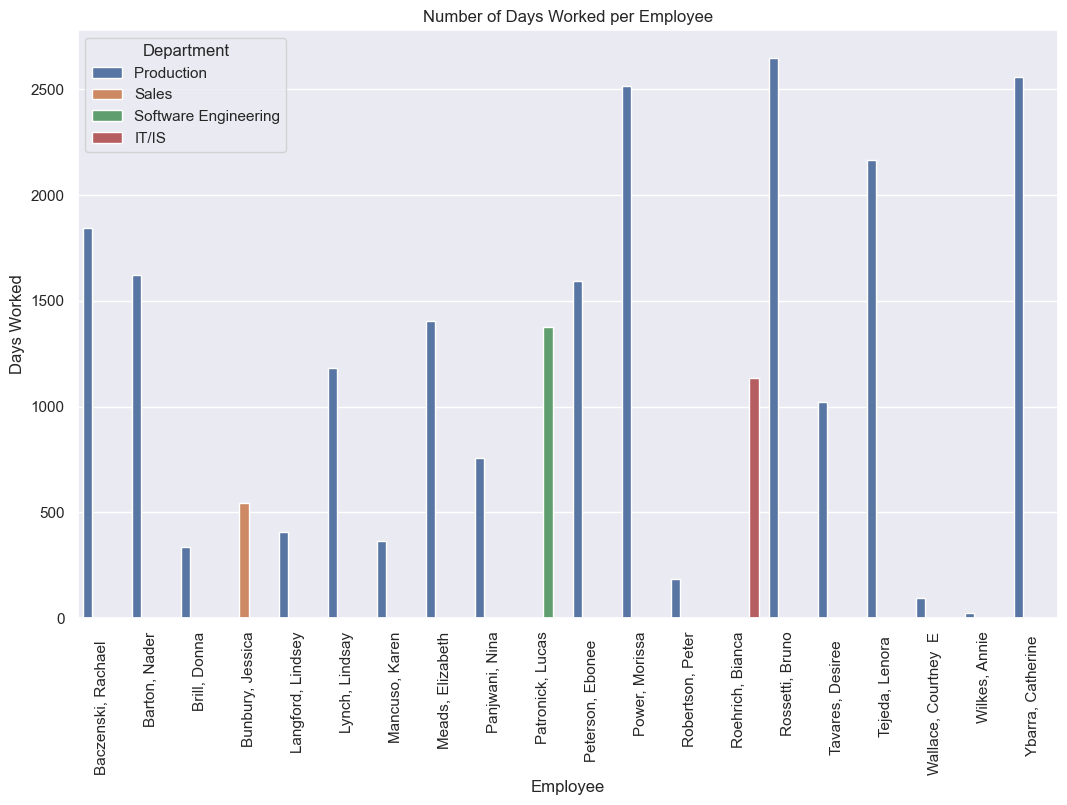

In [459]:
#now we will plot a histogram chart of the 'Timeworked' per each 'Employee_Name' per each 'Department'
# Convert 'Timeworked' column to numeric (days)
df_anoposition['Timeworked'] = df_anoposition['Timeworked'].dt.days

# Define the order of hue colors based on department
hue_order = df_anoposition['Department'].unique()

# Create a bar plot with hue colors representing the department
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Name', y='Timeworked', hue='Department', hue_order=hue_order, data=df_anoposition)
plt.title('Number of Days Worked per Employee')
plt.xlabel('Employee')
plt.ylabel('Days Worked')
plt.xticks(rotation=90)
plt.legend(title='Department')
plt.show()

In [172]:
#we see that there are a lot of employees that left the company from the Production Department

Department            Position                  PerformanceScore  EngagementSurvey  Salary  EmpSatisfaction  SpecialProjectsCount  Absences
IT/IS                 Principal Data Architect  Fully Meets       3.88              120000  3                7                     12          1
Production            Production Manager        Fully Meets       4.16              74669   5                0                     6           1
Sales                 Area Sales Manager        Fully Meets       3.14              74326   5                0                     19          1
Production            Production Manager        Fully Meets       4.50              80512   3                0                     5           1
                      Production Technician I   Exceeds           5.00              47434   4                0                     17          1
                                                Fully Meets       3.17              46799   4                0                     14  

In [ ]:
df_anoposition.groupby('Employee_Name')['']

In [292]:
# Create an empty dictionary to store the highest count values and their counts for each column
highest_count_values = {}

# Iterate over the columns of the DataFrame
for column in df_anoposition.columns:
    # Get the value counts for the current column
    value_counts = df_anoposition[column].value_counts()
    
    # Check if there are any values with the highest count
    if len(value_counts) > 0:
        # Get the value(s) with the highest count
        highest_count = value_counts.idxmax()  # Get the index of the highest count value
        
        # Get the count of the highest count value
        highest_count_count = value_counts[highest_count]
        
        # Store the highest count value and its count in the dictionary
        highest_count_values[column] = {'value': highest_count, 'count': highest_count_count}

# Print the highest count values and their counts for each column
for column, values in highest_count_values.items():
    print(f"Column: {column}")
    print(f"Highest Count Value: {values['value']}")
    print(f"Count: {values['count']}")
    print()

Column: Employee_Name
Highest Count Value: Baczenski, Rachael  
Count: 1

Column: EmpID
Highest Count Value: 10252
Count: 1

Column: PerfScoreID
Highest Count Value: 3
Count: 17

Column: Salary
Highest Count Value: 54670
Count: 1

Column: Position
Highest Count Value: Production Technician I
Count: 11

Column: DateofHire
Highest Count Value: 1/10/2011
Count: 2

Column: Department
Highest Count Value: Production       
Count: 17

Column: ManagerName
Highest Count Value: David Stanley
Count: 3

Column: PerformanceScore
Highest Count Value: Fully Meets
Count: 17

Column: EngagementSurvey
Highest Count Value: 5.0
Count: 5

Column: EmpSatisfaction
Highest Count Value: 5
Count: 8

Column: SpecialProjectsCount
Highest Count Value: 0
Count: 18

Column: LastPerformanceReview_Date
Highest Count Value: 3/4/2013
Count: 2

Column: DaysLateLast30
Highest Count Value: 0
Count: 18

Column: Absences
Highest Count Value: 12
Count: 2



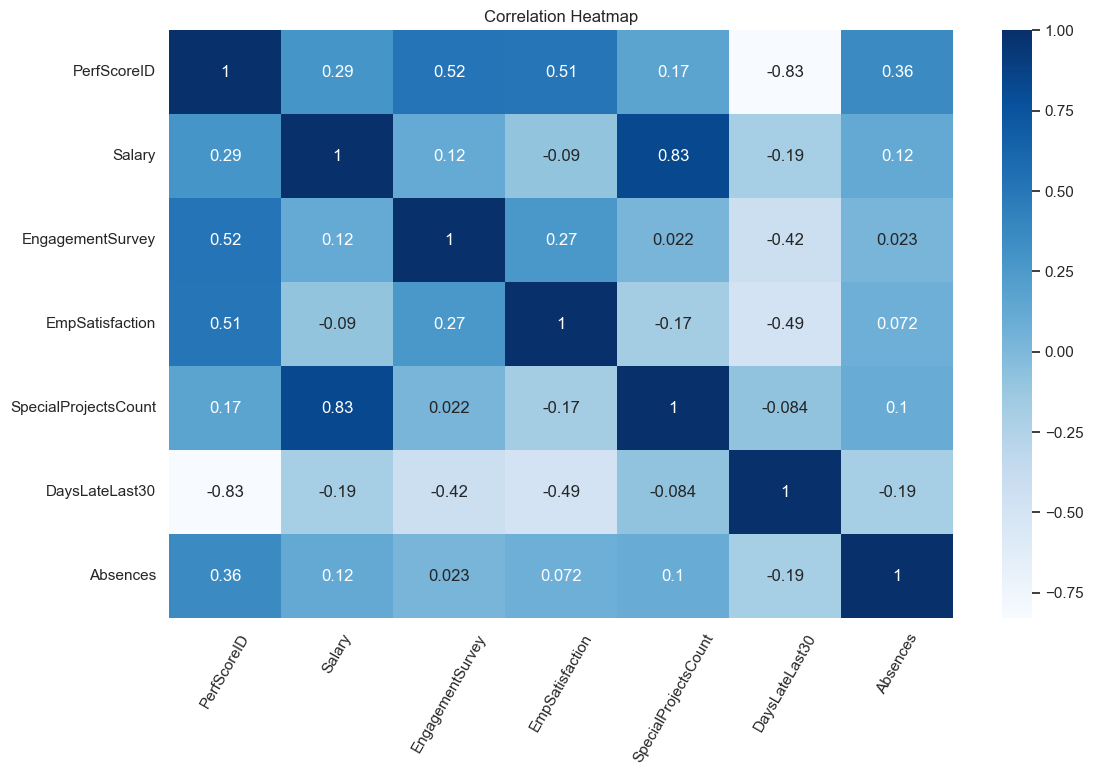

In [286]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
# Select numerical columns only
numerical_columns = df_anoposition.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.xticks(rotation=60)
plt.show()